# Lecture 6: Data Joining using Pandas

Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- inner join, outer join, left join, right join

#### References:

[1] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
<br>[2] https://www.tutorialspoint.com/python_pandas/python_pandas_merging_joining.htm

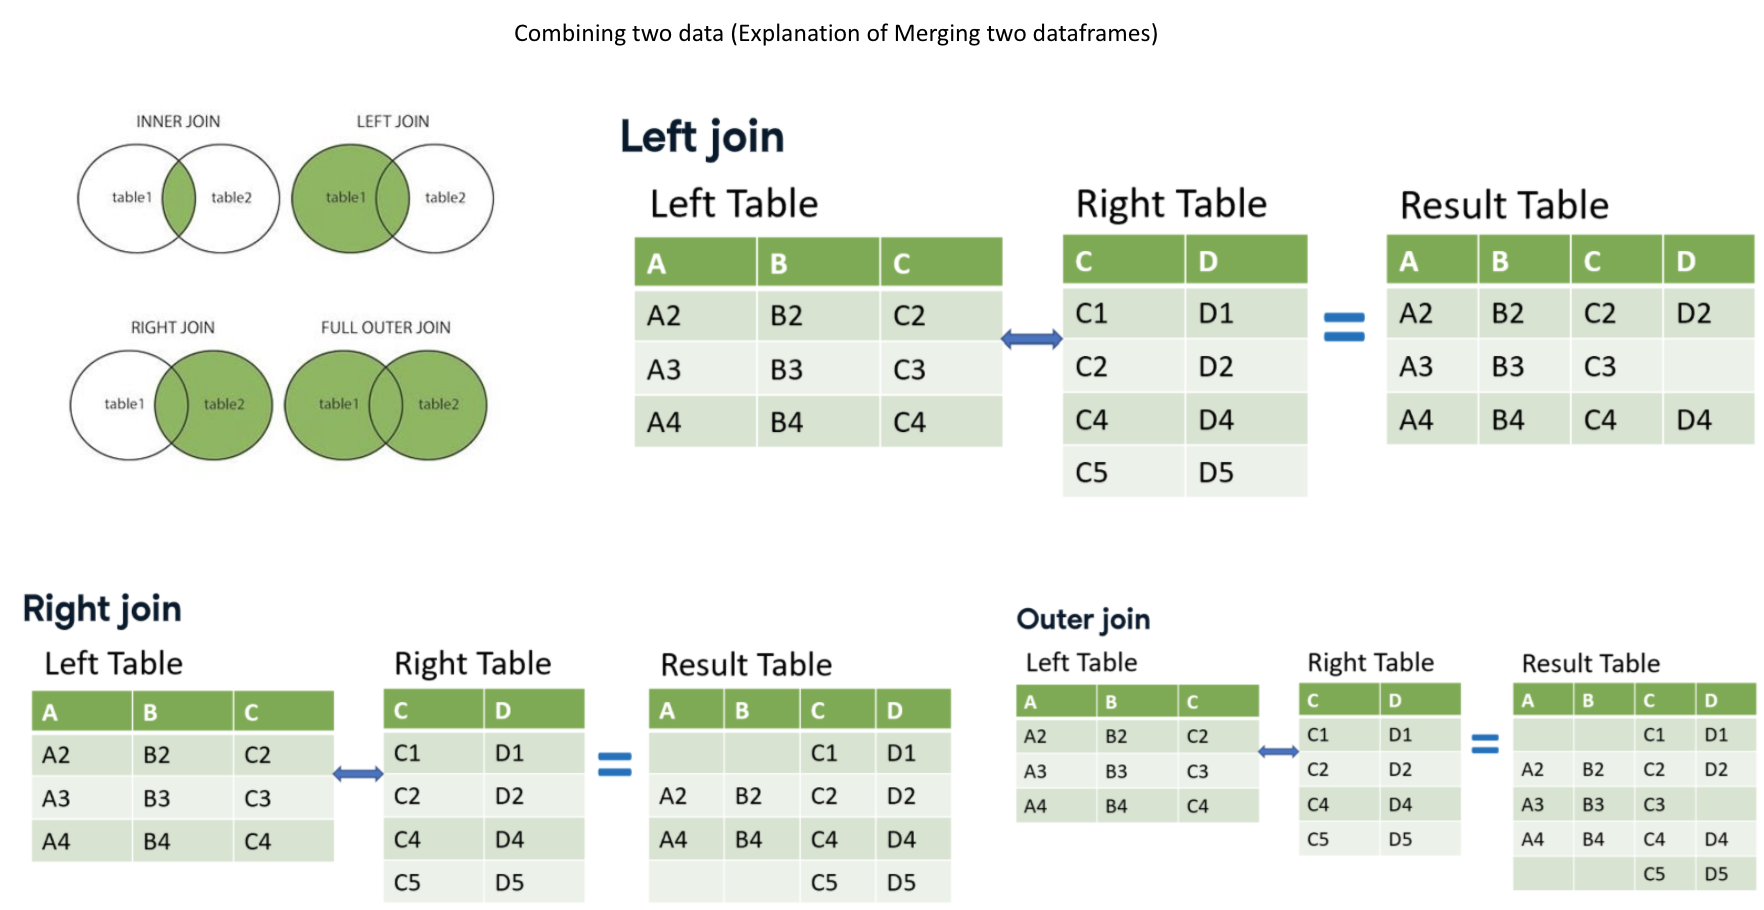
image source: DataCamp

In [60]:
import pandas as pd

#### Creating two random dataframes

In [61]:
df_A = pd.DataFrame()
df_A["Name"] = ["Kawsar", "Tasnim", "Jakir"]
df_A["Address"] = ["Houston", "Boise", "Tampa"]
df_A["University"] = ["USF", "BSU", "USF"]

display(df_A)
# print(type(df_A))
print(df_A.shape)

,Name,Address,University
0,Kawsar,Houston,USF
1,Tasnim,Boise,BSU
2,Jakir,Tampa,USF


(3, 3)


In [62]:
df_C = pd.DataFrame({"Name":["Kawsar", "Tasnim", "Riad"], 
                     "Department": ["EEE", "CSE", "EEE"],
                     "Address": ["Texas", "Idaho", "Dhaka"]})

display(df_C)

,Name,Department,Address
0,Kawsar,EEE,Texas
1,Tasnim,CSE,Idaho
2,Riad,EEE,Dhaka


In [63]:
df_B = pd.DataFrame({"Name":["Kawsar", "Tasnim", "Riad"], 
                     "Department": ["EEE", "CSE", "EEE"],
                     "Address": ["Houston", "Boise", "Dhaka"]})

display(df_B)

,Name,Department,Address
0,Kawsar,EEE,Houston
1,Tasnim,CSE,Boise
2,Riad,EEE,Dhaka


#### inner join

In [64]:
df_inner_e1 = df_A.merge(df_B, how="inner", on=["Name"])
df_inner_e2 = df_A.merge(df_B, how="inner", on=["Address"])
df_inner_e3 = df_A.merge(df_B, how="inner", on=["Name", "Address"])
# df_inner_e3 = df_A.merge(df_B, how="inner")

display(df_inner_e1)
display(df_inner_e2)
display(df_inner_e3)

,Name,Address_x,University,Department,Address_y
0,Kawsar,Houston,USF,EEE,Houston
1,Tasnim,Boise,BSU,CSE,Boise


,Name_x,Address,University,Name_y,Department
0,Kawsar,Houston,USF,Kawsar,EEE
1,Tasnim,Boise,BSU,Tasnim,CSE


,Name,Address,University,Department
0,Kawsar,Houston,USF,EEE
1,Tasnim,Boise,BSU,CSE


In [65]:
df_inner_e4 = df_B.merge(df_A, how="inner", on=["Name"], suffixes=["_B", "_A"])
df_inner_e5 = df_B.merge(df_A, how="inner", on=["Address"], suffixes=["_B", "_A"])
df_inner_e6 = df_B.merge(df_A, how="inner", on=["Name", "Address"])

display(df_inner_e4)
display(df_inner_e5)
display(df_inner_e6)

,Name,Department,Address_B,Address_A,University
0,Kawsar,EEE,Houston,Houston,USF
1,Tasnim,CSE,Boise,Boise,BSU


,Name_B,Department,Address,Name_A,University
0,Kawsar,EEE,Houston,Kawsar,USF
1,Tasnim,CSE,Boise,Tasnim,BSU


,Name,Department,Address,University
0,Kawsar,EEE,Houston,USF
1,Tasnim,CSE,Boise,BSU


#### left join

In [66]:
df_left_e1 = df_A.merge(df_C, how="left")
df_left_e2 = df_A.merge(df_C, how="left", on=["Name", "Address"])
df_left_e3 = df_A.merge(df_C, how="left", on=["Name"])
df_left_e4 = df_A.merge(df_C, how="left", on=["Address"])

display(df_left_e1)
display(df_left_e2)
display(df_left_e3)
display(df_left_e4)

,Name,Address,University,Department
0,Kawsar,Houston,USF,NaN
1,Tasnim,Boise,BSU,NaN
2,Jakir,Tampa,USF,NaN


,Name,Address,University,Department
0,Kawsar,Houston,USF,NaN
1,Tasnim,Boise,BSU,NaN
2,Jakir,Tampa,USF,NaN


,Name,Address_x,University,Department,Address_y
0,Kawsar,Houston,USF,EEE,Texas
1,Tasnim,Boise,BSU,CSE,Idaho
2,Jakir,Tampa,USF,NaN,NaN


,Name_x,Address,University,Name_y,Department
0,Kawsar,Houston,USF,NaN,NaN
1,Tasnim,Boise,BSU,NaN,NaN
2,Jakir,Tampa,USF,NaN,NaN


#### outer join

In [67]:
display(df_A)
display(df_C)

,Name,Address,University
0,Kawsar,Houston,USF
1,Tasnim,Boise,BSU
2,Jakir,Tampa,USF


,Name,Department,Address
0,Kawsar,EEE,Texas
1,Tasnim,CSE,Idaho
2,Riad,EEE,Dhaka


In [68]:
df_outer_e1 = df_A.merge(df_C, how="outer")
df_outer_e2 = df_A.merge(df_C, how="outer", on=["Name", "Address"])
df_outer_e3 = df_A.merge(df_C, how="outer", on=["Name"])
df_outer_e4 = df_A.merge(df_C, how="outer", on=["Address"])

display(df_outer_e1)
display(df_outer_e2)
display(df_outer_e3)
display(df_outer_e4)

,Name,Address,University,Department
0,Kawsar,Houston,USF,NaN
1,Tasnim,Boise,BSU,NaN
2,Jakir,Tampa,USF,NaN
3,Kawsar,Texas,NaN,EEE
4,Tasnim,Idaho,NaN,CSE
5,Riad,Dhaka,NaN,EEE


,Name,Address,University,Department
0,Kawsar,Houston,USF,NaN
1,Tasnim,Boise,BSU,NaN
2,Jakir,Tampa,USF,NaN
3,Kawsar,Texas,NaN,EEE
4,Tasnim,Idaho,NaN,CSE
5,Riad,Dhaka,NaN,EEE


,Name,Address_x,University,Department,Address_y
0,Kawsar,Houston,USF,EEE,Texas
1,Tasnim,Boise,BSU,CSE,Idaho
2,Jakir,Tampa,USF,NaN,NaN
3,Riad,NaN,NaN,EEE,Dhaka


,Name_x,Address,University,Name_y,Department
0,Kawsar,Houston,USF,NaN,NaN
1,Tasnim,Boise,BSU,NaN,NaN
2,Jakir,Tampa,USF,NaN,NaN
3,NaN,Texas,NaN,Kawsar,EEE
4,NaN,Idaho,NaN,Tasnim,CSE
5,NaN,Dhaka,NaN,Riad,EEE


#### right join

In [69]:
df_right_e1 = df_A.merge(df_C, how="right")
df_right_e2 = df_A.merge(df_C, how="right", on=["Name", "Address"])
df_right_e3 = df_A.merge(df_C, how="right", on=["Name"])
df_right_e4 = df_A.merge(df_C, how="right", on=["Address"])

display(df_right_e1)
display(df_right_e2)
display(df_right_e3)
display(df_right_e4)

,Name,Address,University,Department
0,Kawsar,Texas,NaN,EEE
1,Tasnim,Idaho,NaN,CSE
2,Riad,Dhaka,NaN,EEE


,Name,Address,University,Department
0,Kawsar,Texas,NaN,EEE
1,Tasnim,Idaho,NaN,CSE
2,Riad,Dhaka,NaN,EEE


,Name,Address_x,University,Department,Address_y
0,Kawsar,Houston,USF,EEE,Texas
1,Tasnim,Boise,BSU,CSE,Idaho
2,Riad,NaN,NaN,EEE,Dhaka


,Name_x,Address,University,Name_y,Department
0,NaN,Texas,NaN,Kawsar,EEE
1,NaN,Idaho,NaN,Tasnim,CSE
2,NaN,Dhaka,NaN,Riad,EEE
